In [12]:
import hydra
from omegaconf import DictConfig, OmegaConf
import wandb

from data import *
from lstm import LSTMRecurrentModel
from s4 import BatchStackedModel, S4Layer, SSMLayer
from train import *
from utilities import *

import copy
from functools import partial
import jax
import jax.numpy as np
import numpy
import torch
from tqdm import tqdm

import foolbox
from foolbox.attacks import SpatialAttack
from foolbox import JAXModel, accuracy, samples

from utilities import *
import matplotlib.pyplot as plt


In [29]:
#np.save("pgd_"+str(init_label)+"_"+str(eps), X)
orig  = np.load("pgd_4_0.0.npy").flatten()
pgd01 = np.load("pgd_4_0.1.npy").flatten()
pgd02 = np.load("pgd_4_0.2.npy").flatten()
pgd03 = np.load("pgd_4_0.3.npy").flatten()
fgsm01 = np.load("fgsm_4_0.1.npy").flatten()
fgsm03 = np.load("fgsm_4_0.3.npy").flatten()

In [17]:
orig

Array([ 6.2561019e-05, -4.9285893e-04, -7.5836183e-04, ...,
        4.3792726e-04,  2.0294190e-04,  2.5787353e-04], dtype=float32)

In [22]:
orig.shape

(5334,)

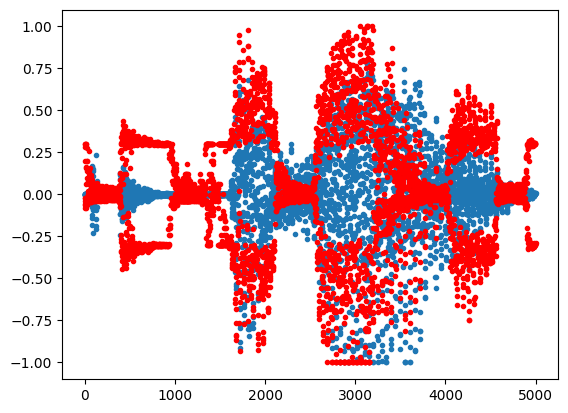

In [26]:
lb = 0
ub = 5000

plt.scatter(np.arange(lb,ub,1), orig[lb:ub], marker=".")
plt.scatter(np.arange(lb,ub,1), pgd03[lb:ub], marker=".", color="red")
plt.show()

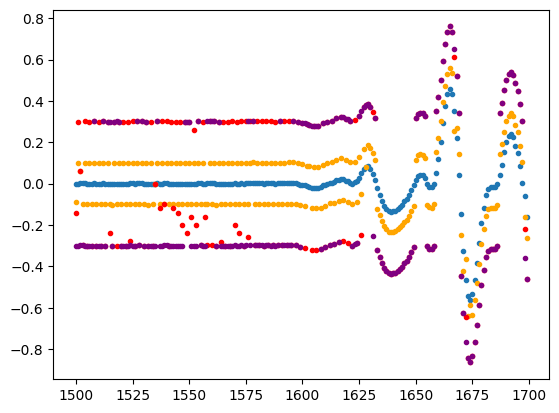

In [28]:
lb = 1500
ub = 1700

plt.scatter(np.arange(lb,ub,1), orig[lb:ub], marker=".")
plt.scatter(np.arange(lb,ub,1), pgd01[lb:ub], marker=".", color="orange")
plt.scatter(np.arange(lb,ub,1), pgd03[lb:ub], marker=".", color="red")
plt.scatter(np.arange(lb,ub,1), fgsm03[lb:ub], marker=".", color="purple")
plt.show()